## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv('data\\netflix_titles.csv')

In [3]:
netflix.shape

(8807, 12)

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Check for null values

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dropping unnecessary columns

In [7]:
netflix = netflix.drop(['director', 'cast', 'description'], axis=1)

In [8]:
netflix.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
netflix.isna().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

Fix data types

In [10]:
netflix.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [11]:
netflix['type'] = pd.Categorical(netflix['type'])

In [12]:
netflix['date_added'] = netflix['date_added'].astype('datetime64[ns]')

In [13]:
netflix['rating'] = pd.Categorical(netflix['rating'])

In [14]:
netflix.dtypes

show_id                 object
type                  category
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
dtype: object

In [15]:
netflix['rating'].cat.categories

Index(['66 min', '74 min', '84 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object')

In [16]:
netflix[netflix['rating'] == "66 min"]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,NaN,Movies


In [17]:
netflix[netflix['rating'] == "74 min"]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,NaN,Movies


In [18]:
netflix[netflix['rating'] == "84 min"]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,NaN,Movies


Risolvere questi 3 problemi risolve anche i 3 missing values precedentemente trovati per la colonna duration.

In [19]:
netflix.loc[netflix.rating == "66 min", 'duration'] = "66 min"

In [20]:
netflix.loc[netflix.rating == "74 min", 'duration'] = "74 min"

In [21]:
netflix.loc[netflix.rating == "84 min", 'duration'] = "84 min"

In [22]:
netflix[netflix['rating'] == "84 min"]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,84 min,Movies


In [23]:
netflix.loc[netflix['rating'] == "66 min", 'rating'] = np.nan

In [24]:
netflix.loc[netflix['rating'] == "74 min", 'rating'] = np.nan

In [25]:
netflix.loc[netflix['rating'] == "84 min", 'rating'] = np.nan

Idea: dividi rating a seconda dell'età consentita in ITA, ad esempio vedi sotto

ITALIA

I film sono classificati in quattro categorie:

T: Film per tutti.

6+: Non adatto ai minori di 6 anni.

14+: Vietato ai minori di 14 anni; spettatori che hanno compiuto i 12 anni sono ammessi alla proiezione se accompagnati da un genitore o da un tutore.

18+: Vietato ai minori di 18 anni; spettatori che hanno compiuto i 16 anni sono ammessi alla proiezione se accompagnati da un genitore o da un tutore.

source: https://it.wikipedia.org/wiki/Sistemi_di_classificazione_dei_film

TV-Y: This program is designed to be appropriate for all children.

TV-Y7: This program is designed for children age 7 and above.

TV-G: This program is suitable for all ages.

TV-PG: This program contains material that parents may find unsuitable for younger children (hence, Parental Guidance)

TV-14: This program contains some material that many parents would find unsuitable for children under 14 years of age.

TV-MA: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

G: This program is suitable for all ages.

NC-17: unsuitable for children under 17.

NR: not rated.

PG: may find unsuitable for younger children. I would say it is the same as TV-PG

PG-13: for children over 13.

R: restricted, only for children over 12.

TV-Y7-FV: Fantasy violence (exclusive to the TV-Y7 rating)

UR: not rated, as in (unrated).

source: https://en.wikipedia.org/wiki/Television_content_rating_system

In [26]:
"""
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
"""

"\nratings_ages = {\n    'TV-PG': 'Older Kids',\n    'TV-MA': 'Adults',\n    'TV-Y7-FV': 'Older Kids',\n    'TV-Y7': 'Older Kids',\n    'TV-14': 'Teens',\n    'R': 'Adults',\n    'TV-Y': 'Kids',\n    'NR': 'Adults',\n    'PG-13': 'Teens',\n    'TV-G': 'Kids',\n    'PG': 'Older Kids',\n    'G': 'Kids',\n    'UR': 'Adults',\n    'NC-17': 'Adults'\n}\n"

In [27]:
ratings_ages = {
    'G': 'T',
    'TV-G': 'T',
    'TV-Y': 'T',
    'TV-PG': '6+',
    'TV-Y7-FV': '6+',
    'TV-Y7': '6+',
    'PG': '6+',
    'TV-14': '14+',
    'PG-13': '14+',
    'R': '18+',
    'TV-MA': '18+',
    'NC-17': '18+',
    'UR': '18+',
    'NR': '18+'
}

In [28]:
netflix['target_ages'] = netflix['rating'].replace(ratings_ages)
netflix['target_ages'].unique()

array(['14+', '18+', '6+', 'T', nan], dtype=object)

In [29]:
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,14+
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",18+
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",18+
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",18+
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",18+


Risolvo altre criticità null values

In [30]:
netflix[netflix['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,NaN,74 min,Movies,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,NaN,84 min,Movies,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,NaN,66 min,Movies,NaN
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017-01-26,2017,NaN,37 min,Movies,NaN
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows",NaN
7312,s7313,TV Show,Little Lunch,Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies",NaN
7537,s7538,Movie,My Honor Was Loyalty,Italy,2017-03-01,2015,NaN,115 min,Dramas,NaN


In [31]:
netflix[netflix['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",18+
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,6+
6795,s6796,TV Show,Frasier,United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",6+
6806,s6807,TV Show,Friends,United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",14+
6901,s6902,TV Show,Gunslinger Girl,Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows",14+
7196,s7197,TV Show,Kikoriki,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,T
7254,s7255,TV Show,La Familia P. Luche,United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",14+
7406,s7407,TV Show,Maron,United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,18+
7847,s7848,TV Show,Red vs. Blue,United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",18+
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies",6+


Divisione tra film e serie tv

In [32]:
netflix_f = netflix[netflix['type'] == "Movie"]

In [33]:
netflix_f.shape

(6131, 10)

In [34]:
netflix_s = netflix[netflix['type'] == "TV Show"] 

In [35]:
netflix_s.shape

(2676, 10)

Change duration column to numeric

In [36]:
netflix_f[['duration_min', 'min']] = netflix_f['duration'].str.split(' ', expand=True)

C:\Users\GRMITALY\miniconda3\envs\MainEnv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [37]:
netflix_f.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages,duration_min,min
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,14+,90,min
6,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,6+,91,min
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",18+,125,min
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",14+,104,min
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",18+,127,min


In [38]:
# netflix_f['duration_min'].astype('float')

netflix_f.duration_min = pd.to_numeric(netflix_f.duration_min, errors='coerce')

C:\Users\GRMITALY\miniconda3\envs\MainEnv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
netflix_f[netflix_f.isna()].sum()

C:\Users\GRMITALY\AppData\Local\Temp/ipykernel_13992/4018600748.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  netflix_f[netflix_f.isna()].sum()


show_id           0
title             0
country           0
release_year    0.0
duration          0
listed_in         0
target_ages       0
duration_min    0.0
min               0
dtype: object

In [40]:
netflix_f = netflix_f.drop(['duration', 'min'], axis=1)

In [41]:
netflix_f.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in,target_ages,duration_min
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,Documentaries,14+,90
6,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,Children & Family Movies,6+,91
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",18+,125
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,"Comedies, Dramas",14+,104
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,"Dramas, International Movies",18+,127


In [42]:
netflix_f.sort_values(by='duration_min')

,show_id,type,title,country,date_added,release_year,rating,listed_in,target_ages,duration_min
3777,s3778,Movie,Silent,United States,2019-06-04,2014,TV-Y,"Children & Family Movies, Sci-Fi & Fantasy",T,3
2713,s2714,Movie,Sol Levante,Japan,2020-04-02,2020,TV-14,"Action & Adventure, Anime Features, Internatio...",14+,5
1484,s1485,Movie,Cops and Robbers,United States,2020-12-28,2020,PG-13,Dramas,14+,8
1557,s1558,Movie,Canvas,United States,2020-12-11,2020,G,"Children & Family Movies, Dramas",T,9
3535,s3536,Movie,American Factory: A Conversation with the Obamas,United States,2019-09-05,2019,TV-G,Documentaries,T,10
...,...,...,...,...,...,...,...,...,...,...
2484,s2485,Movie,Lock Your Girls In,NaN,2020-05-21,1982,TV-PG,"Comedies, International Movies, Romantic Movies",6+,233
2487,s2488,Movie,No Longer kids,Egypt,2020-05-21,1979,TV-14,"Comedies, Dramas, International Movies",14+,237
2491,s2492,Movie,The School of Mischief,Egypt,2020-05-21,1973,TV-14,"Comedies, Dramas, International Movies",14+,253
717,s718,Movie,Headspace: Unwind Your Mind,NaN,2021-06-15,2021,TV-G,Documentaries,T,273


## DataViz

## 0 - Waffle division number of films and tv shows

In [43]:
dict_FvsS = {'type':["Movies", "TV Shows"],
             'num':["6131", "2676"]}

df_FvsS = pd.DataFrame(dict_FvsS)

In [44]:
df_FvsS

,type,num
0,Movies,6131
1,TV Shows,2676


In [45]:
df_FvsS.dtypes

type    object
num     object
dtype: object

In [46]:
df_FvsS['type'] = pd.Categorical(df_FvsS['type'])
df_FvsS['num'] = df_FvsS['num'].astype('int')

In [47]:
df_FvsS.dtypes

type    category
num        int32
dtype: object

In [48]:
# pip install pywaffle
from pywaffle import Waffle

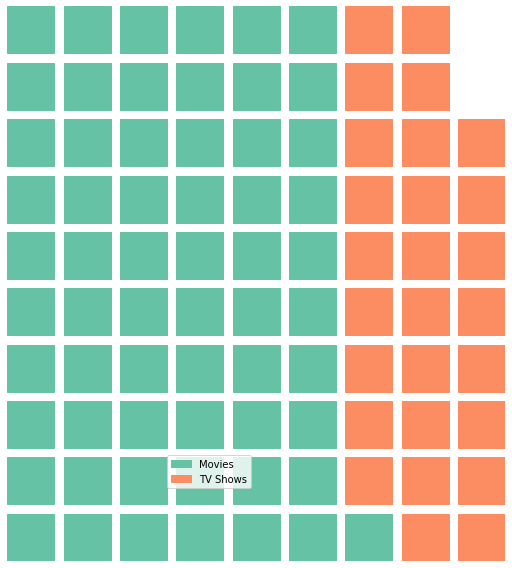

In [49]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=list(df_FvsS.num/100),
    labels=list(df_FvsS.type),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.2) }
)

## 1 - correlation btw years and duration of films

correlazione tra anni e durata dei film

domanda di ricerca: come per la musica, è vero che si è ridotta attenzione utenti e dunque si producono film meno lunghi rispetto a prima?

(forse dataset più adatto un archivio di film rispetto a netflix che ha molti film recenti;

inoltre all'inizio non si potevano fare film troppo lunghi per costi e tecnologie, quindi magari indagare trend più recente o spazio temporale ristretto)

In [50]:
film_years = netflix_f.groupby('release_year')['release_year'].count()

In [51]:
film_years.tail(20)

release_year
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    154
2011    145
2012    173
2013    225
2014    264
2015    398
2016    658
2017    767
2018    767
2019    633
2020    517
2021    277
Name: release_year, dtype: int64

In [52]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

x = netflix_f['release_year']
y = netflix_f['duration_min']

plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                step="year",
                stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

In [53]:
netflix_f[netflix_f['duration_min'] < 15].count()

show_id         16
type            16
title           16
country         12
date_added      16
release_year    16
rating          16
listed_in       16
target_ages     16
duration_min    16
dtype: int64

In [54]:
netflix_f[netflix_f['duration_min'] < 15][['title', 'release_year', 'duration_min']]

,title,release_year,duration_min
71,A StoryBots Space Adventure,2021,13
694,Aziza,2019,13
695,Besieged Bread,2015,12
1425,Creating The Queen's Gambit,2021,14
1484,Cops and Robbers,2020,8
1557,Canvas,2020,9
1669,If Anything Happens I Love You,2020,13
2713,Sol Levante,2020,5
2858,Calico Critters: Everyone's Big Dream Flying i...,2019,11
3364,The Road to El Camino: Behind the Scenes of El...,2019,14


controllato alcuni a caso su internet ed effettivamente hanno questa durata

#### Line chart anni e durata film ultimi 15 anni

In [55]:
netflix_last15 = netflix_f[netflix_f['release_year'] > 2006][['title', 'release_year', 'duration_min']]

In [56]:
netflix_last15.head()

,title,release_year,duration_min
0,Dick Johnson Is Dead,2020,90
6,My Little Pony: A New Generation,2021,91
9,The Starling,2021,104
12,Je Suis Karl,2021,127
13,Confessions of an Invisible Girl,2021,91


In [57]:
netflix_last15.groupby('release_year')['duration_min'].transform('mean')

0        92.141199
6        96.444043
9        96.444043
12       96.444043
13       96.444043
           ...    
8799    108.949153
8801     99.429648
8802    113.229730
8804    108.949153
8806     99.429648
Name: duration_min, Length: 5283, dtype: float64

## 2 - bar chart difference btw number of movies or tv shows during the years

differenza tra numero di film e numero di serie tv legato all'anno di uscita

In [58]:
#creazione nuovo dataframe
dataframe = pd.DataFrame({"release_year":[], "movies": [], "tv_series":[]})
#ciclo for per ogni classe d'età
for item in netflix["release_year"].unique():
  #query per identificare i record con punteggio peggiorato per la classe d'età in esame
  queryStringMovies = "release_year == "+str(item)+" and type == 'Movie'"
  #query per identificare i record con punteggio migliorato per la classe d'età in esame
  queryStringTV = "release_year == "+str(item)+" and type == 'TV Show'"

  #query
  resMovies = netflix.query(queryStringMovies)
  resTV = netflix.query(queryStringTV)
  #inserimento nel dataframe del numero di migliorati o peggiorati per la classe d'età in esame
  dataframe.loc[len(dataframe.index)] = [str(item), len(resMovies), len(resTV)]
#ordinamento delle classi d'età
dataframe = dataframe.sort_values("release_year")

dataframe.head()


,release_year,movies,tv_series
57,1925,0.0,1.0
69,1942,2.0,0.0
73,1943,3.0,0.0
71,1944,3.0,0.0
49,1945,3.0,1.0


In [59]:
dataframe['movies'] = dataframe['movies'].astype('float')
dataframe['tv_series'] = dataframe['tv_series'].astype('float')

dataframe = pd.eval("delta = dataframe.movies - dataframe.tv_series", target=dataframe)

In [60]:
dataframe.head(1)

,release_year,movies,tv_series,delta
57,1925,0.0,1.0,-1.0


In [61]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.show()

In [62]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.update_xaxes(type="log")
fig.show()

In [63]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.update_xaxes(type="date")
fig.show()

In [64]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y="delta")
fig.show()

In [65]:
dataframe.dtypes

release_year     object
movies          float64
tv_series       float64
delta           float64
dtype: object

In [66]:
dataframe['release_year'] = dataframe['release_year'].astype('int')

In [67]:
dataframe.dtypes

release_year      int32
movies          float64
tv_series       float64
delta           float64
dtype: object

In [68]:
# aggiungo decade al df

dataframe.loc[dataframe['release_year'] <= 1930, 'decade'] = 1930
dataframe.loc[dataframe['release_year'].between(1930,1940), 'decade'] = 1940
dataframe.loc[dataframe['release_year'].between(1940,1950), 'decade'] = 1950
dataframe.loc[dataframe['release_year'].between(1950,1960), 'decade'] = 1960
dataframe.loc[dataframe['release_year'].between(1960,1970), 'decade'] = 1970
dataframe.loc[dataframe['release_year'].between(1970,1980), 'decade'] = 1980
dataframe.loc[dataframe['release_year'].between(1980,1990), 'decade'] = 1990
dataframe.loc[dataframe['release_year'].between(1990,2000), 'decade'] = 2000
dataframe.loc[dataframe['release_year'].between(2000,2010), 'decade'] = 2010
dataframe.loc[dataframe['release_year'].between(2010,2020), 'decade'] = 2020
dataframe.loc[dataframe['release_year'].between(2020,2030), 'decade'] = 2030

In [69]:
dataframe['decade'] = pd.Categorical(dataframe['decade'])

In [70]:
dataframe_10 = dataframe.loc[dataframe['release_year'] >= 2010]

In [71]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_style(style='white')

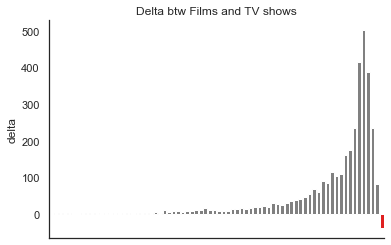

In [72]:
clrs = ['grey' if (x > min(dataframe['delta'])) else 'red' for x in dataframe['delta']]
ax = sns.barplot(x='release_year', y='delta', palette=clrs, data=dataframe)
sns.despine()

ax.set(xticklabels=[])  
ax.set(title='Delta btw Films and TV shows')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

[Text(0.5, 1.0, 'Delta btw Films and TV shows')]

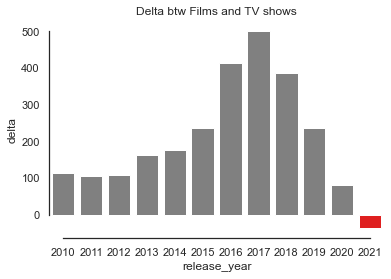

In [73]:
# dataframe_10['dPos'] = dataframe_10['delta'] >= 0
clrs = ['grey' if (x > min(dataframe_10['delta'])) else 'red' for x in dataframe_10['delta']]
ax = sns.barplot(x='release_year', y='delta', palette=clrs, data=dataframe_10)
sns.despine(trim=True)

ax.set(title='Delta btw Films and TV shows')

## 3 - correlation btw years and target age

In [83]:
netflix_f[netflix_f['release_year'].isna()]

,show_id,type,title,country,date_added,release_year,rating,listed_in,target_ages,duration_min


In [84]:
netflix_f[netflix_f['target_ages'].isna()]

,show_id,type,title,country,date_added,release_year,rating,listed_in,target_ages,duration_min
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,NaN,Movies,NaN,74
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,NaN,Movies,NaN,84
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,NaN,Movies,NaN,66
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017-01-26,2017,NaN,Movies,NaN,37
7537,s7538,Movie,My Honor Was Loyalty,Italy,2017-03-01,2015,NaN,Dramas,NaN,115


In [88]:
# drop rows with na

netflix_f2 = netflix_f

In [89]:
netflix_f2 = netflix_f2[netflix_f2['target_ages'].notna()]

In [90]:
netflix_f2[netflix_f2['target_ages'].isna()]

,show_id,type,title,country,date_added,release_year,rating,listed_in,target_ages,duration_min


In [92]:
import plotly.express as px

fig = px.scatter(netflix_f2, x='release_year', color='target_ages', symbol='target_ages')
fig.show()